In [1]:

import numpy as np
from scipy.optimize import minimize


In [2]:

utility_params = { 'alpha': 0.3,
                    'beta': 0.7
                    }

In [3]:
budget_params = { 'price1': 1,
                  'price2': 5,
                  'income': 30
                    }

In [4]:
def budget_constraint(quantity, utility_dict, budget_dict):
    price_1 = budget_dict['price1']
    price_2 = budget_dict['price2']
    income  = budget_dict['income']
    qty1  = quantity[0]
    qty2  = quantity[1]
    
    return price_1 * qty1 + price_2 * qty2 - income

In [5]:

def criterion(quantity, utility_dict, budget_dict):
    """
        WRITE DOCS
    """

    alpha   = utility_dict['alpha']
    beta    = utility_dict['beta']

    qty1  = quantity[0]
    qty2  = quantity[1]

    utility = qty1**alpha * qty2 ** beta
    return -utility

In [6]:
criterion(np.array([1,2]), utility_params, budget_params)


-1.624504792712471

In [7]:
params = (utility_params, budget_params)
starting_vals = np.array([1.0,1.0])
bnds = ((0, None), (0, None))

In [8]:
# cons = ({'type': 'eq', 'fun': lambda x: 1*x[0] + 2*x[1] - 30})
cons = ({'type': 'eq', 'fun': budget_constraint,
        'args': (utility_params, budget_params)
            })

In [9]:
res = minimize(criterion, 
                starting_vals, 
                args = params, 
                method='SLSQP', 
                tol = 1e-16,
                constraints=cons,
                bounds = bnds)

In [10]:
print(res)

     fun: -5.278946445143492
     jac: array([-0.17596483, -0.87982434])
 message: 'Optimization terminated successfully.'
    nfev: 70
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([8.99999991, 4.20000002])


In [11]:
res.x[1]

4.200000018306215

In [12]:
p_range = np.linspace(1,10,100, endpoint=True)


In [13]:
my_sol = np.empty(shape = (p_range.size, 2))

for idx, iPrice in enumerate(p_range):
    #print(idx)
    #print('price is: ', iPrice)
    budget_params['price1'] = iPrice
    #print(budget_params['price1'])
    res = minimize(criterion, starting_vals, args = params, method='SLSQP', tol = 1e-16,
               constraints=cons)
    my_sol[idx, 0] = res.x[0]
    my_sol[idx, 1] = res.x[1]


In [14]:
import matplotlib.pyplot as plt

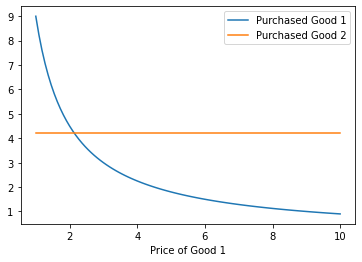

In [15]:
fig, ax = plt.subplots()

ax.plot(p_range, my_sol[:,0], label="Purchased Good 1")
ax.plot(p_range, my_sol[:,1], label="Purchased Good 2")
ax.set_xlabel("Price of Good 1")
ax.legend()